In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.linear_model import orthogonal_mp as OMP
from sklearn.datasets import make_sparse_coded_signal
import scipy.fftpack as fft
import spams as sp

In [3]:
n  = 64
m = 100
N = 500
bins = 30

NZ = np.linspace(1,bins,bins)
L2error = np.zeros(bins)
SupportError = np.zeros(bins)

# A = np.concatenate((np.eye(n),fft.dct(np.eye(n))),axis=1)
# m = 2*n
A = np.random.randn(n,m)
A = A.dot(np.diag(np.sqrt(np.sum(A**2,axis=0))**(-1)) )
mu = np.max(np.abs(A.T.dot(A) - (A.T.dot(A)*np.eye(m))))

nnz = 5
X = np.zeros((m,N))
for j in range(N):
    S = np.random.permutation(m)[0:nnz]
    X[S,j] = (2 + np.random.rand(nnz) ) * ( ((np.random.rand(nnz)<.5)*1.0)*2 -1)
y = A.dot(X)

Alfs = np.linspace(.5,1.2,bins)
Ls = np.linspace(1,bins,bins)

L2error_eps = np.linspace(0,1,bins)
L2error_L = np.linspace(0,1,bins)

# sweeping over error thresholds
sigma = .5
z = y + sigma*np.random.randn(n,N)
for i in range(bins):
    X_hat = sp.omp(np.asfortranarray(z),np.asfortranarray(A),eps=n*(sigma**2)*Alfs[i])
    y_hat = type(X_hat).dot(A, X_hat)
    L2error_eps[i] = np.linalg.norm(y-y_hat)/np.sqrt(n*N*sigma**2)
    
for i in range(bins):
    X_hat = sp.omp(np.asfortranarray(z),np.asfortranarray(A),L=Ls[i])
    y_hat = type(X_hat).dot(A, X_hat)
    L2error_L[i] = np.linalg.norm(y-y_hat)/np.sqrt(n*N*sigma**2)

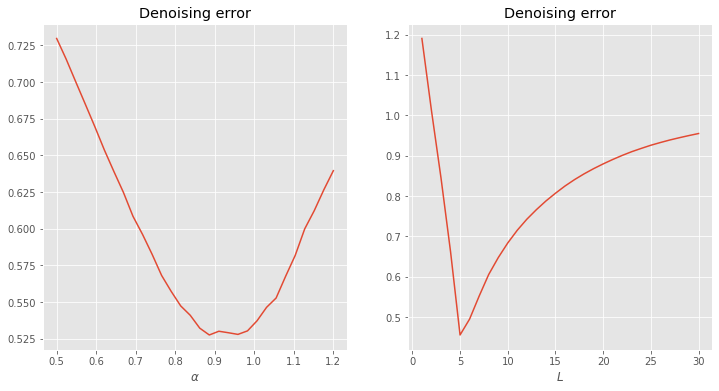

In [4]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(Alfs,L2error_eps)
plt.title('Denoising error')
plt.xlabel(r'$\alpha$')

plt.subplot(1,2,2)
plt.plot(Ls,L2error_L)
plt.title('Denoising error')
plt.xlabel(r'$L$')

plt.show()